## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mickey = pd.read_csv(mouse_metadata_path)
study = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mick_study = pd.merge(mickey, study, on="Mouse ID", how="left")

# Display the data table for preview
mick_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mickey = mick_study["Mouse ID"].count()
num_mickey

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = mick_study[mick_study.duplicated(['Mouse ID', 'Timepoint'])]
dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dups = mick_study[mick_study.duplicated(['Mouse ID'])]

all_dups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mickey = mick_study[mick_study.duplicated(['Mouse ID'])]
clean_mickey.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
clean_mickey.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mickey["Mouse ID"].count()

1644

## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Mean
mean = clean_mickey.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#Median
median = clean_mickey.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#Variance
variance = clean_mickey.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#Standard dev
standard_dv = clean_mickey.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#Sem
sem = clean_mickey.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

sum_table = pd.DataFrame({"Mean": mean,
                          "Median": median,
                          "Variance": variance, 
                          "Standard Deviation": standard_dv, 
                          "SEM": sem})

sum_table.round(2)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.15,40.72,25.43,5.04,0.35
Ceftamin,53.83,52.85,34.73,5.89,0.48
Infubinol,54.17,53.24,38.33,6.19,0.50
Ketapril,56.81,56.10,60.49,7.78,0.61
Naftisol,55.78,54.23,60.79,7.80,0.61
Placebo,55.48,53.35,55.76,7.47,0.60
Propriva,53.67,52.66,38.44,6.20,0.53
Ramicane,39.63,39.77,23.21,4.82,0.34
Stelasyn,55.64,54.33,53.48,7.31,0.58


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

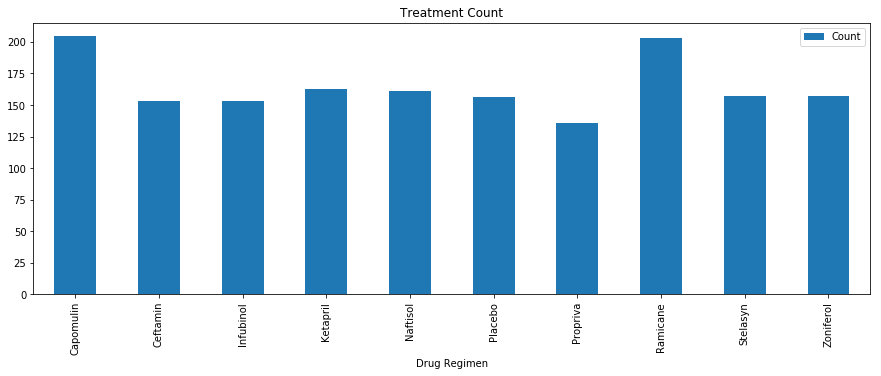

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mick_plot =  pd.DataFrame(clean_mickey.groupby(["Drug Regimen"]).count()).reset_index()

#Filer the dataframe down to two columns
plot_mick = mick_plot[["Drug Regimen","Mouse ID"]]
plot_mick = plot_mick.rename(columns={"Mouse ID": "Count"})

plot_mick = plot_mick.set_index("Drug Regimen")
plot_mick.plot(kind="bar", figsize=(15,5))

plt.title("Treatment Count")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Count')

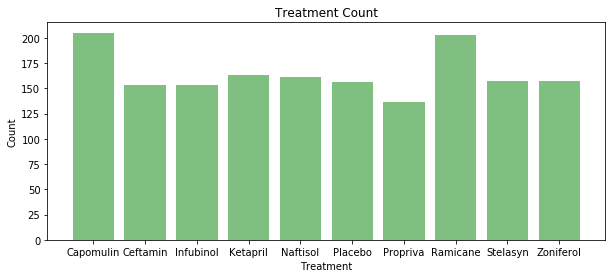

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = sum_table.index.tolist()
drug_count = (clean_mickey.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(drug_count))

# Define x-axis
x_axis = drugs
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, drug_count, color='g', alpha=0.5, align="center")
plt.title("Treatment Count")
plt.xlabel("Treatment")
plt.ylabel('Count')

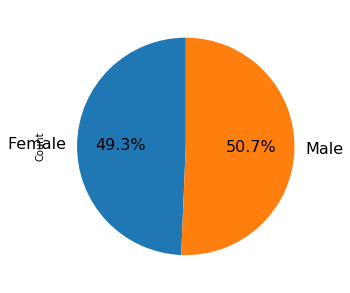

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mick_v_minnie = pd.DataFrame(clean_mickey.groupby(["Sex"]).count()).reset_index()
mick_v_minnie = mick_v_minnie[["Sex", "Mouse ID"]]
mick_v_minnie = mick_v_minnie.rename(columns={"Mouse ID": "Count"})
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121, aspect='equal')
mick_v_minnie.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=mick_v_minnie['Sex'], legend = False, fontsize=16)

([<matplotlib.patches.Wedge at 0x7fa7d6668e48>,
 [Text(-0.5795798800420069, 0.9349262872817798, 'Female'),
  Text(0.5795797925078883, -0.9349263415459601, 'Male')],
 [Text(-0.3161344800229128, 0.5099597930627889, '49.3%'),
  Text(0.3161344322770299, -0.5099598226614327, '50.7%')])

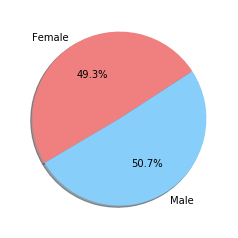

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mick_vs_minnie = (clean_mickey.groupby(["Sex"])["Mouse ID"].count()).tolist()

Sex = ["Female", "Male"]
colors = ["lightcoral","lightskyblue"]

plt.pie(mick_vs_minnie, labels=Sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=33)


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mick_max = clean_mickey.loc[clean_mickey["Timepoint"] == 45]
mick_max = mick_max[["Drug Regimen", "Mouse ID", "Timepoint"]]
mick_max = mick_max.rename(columns={"Timepoint": "Final Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_mickey = pd.merge(
    clean_mickey, mick_max, how="left", on=["Mouse ID", "Mouse ID"])
new_mickey = new_mickey.sort_values(["Timepoint"], ascending=False)

clean_mick = new_mickey.drop_duplicates('Mouse ID')
clean_mick = clean_mick.rename(columns={"Drug Regimen_x": "Drug Regimen",
                                       'Tumor Volume (mm3)': 'Tumor Volume'})


clean_mick.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites,Drug Regimen_y,Final Timepoint
1643,z969,Naftisol,Male,9,30,45,73.867845,4,Naftisol,45.0
514,a897,Placebo,Male,7,28,45,72.255963,4,Placebo,45.0
394,i557,Capomulin,Female,1,24,45,47.685963,1,Capomulin,45.0
413,a203,Infubinol,Female,20,23,45,67.973419,2,Infubinol,45.0
1593,y478,Placebo,Female,3,25,45,66.842635,1,Placebo,45.0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
top_four = clean_mick[clean_mick["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']



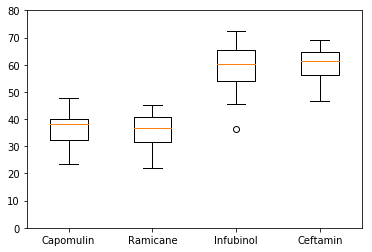

Text(0, 0.5, 'Tumor Volume')

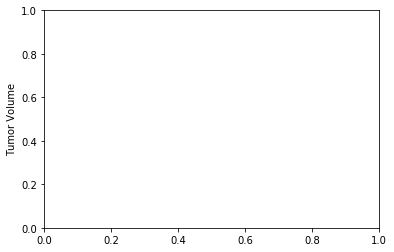

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_one = top_four.reset_index()
box_two = box_one.groupby('Drug Regimen')['Tumor Volume'].apply(list)
box_three = pd.DataFrame(box_two)
box_three = box_three.reindex(treatments)
tumor = [vol for vol in box_three['Tumor Volume']]
plt.boxplot(tumor, labels=treatments)
plt.ylim(0, 80)
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_cap_mice = clean_mickey[clean_mickey["Mouse ID"].isin(["i557"])]
one_mice = one_cap_mice.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})



#Creat Df for plot
mice_line = one_mice[["Mouse ID", "Timepoint", "Tumor Volume"]]

i557 = plt.plot(mice_line["Timepoint"],mice_line["Tumor Volume"], color="red", label="Tumor Volume" )
plt.title("Tumor Volume vs Timepoint for a singular mouse treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(2,47)
plt.ylim(40,50)

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scat = clean_mickey[clean_mickey["Drug Regimen"].isin(["Capomulin"])]
cap_scat = cap_scat[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
cap_scat = cap_scat.drop_duplicates('Mouse ID')
x = cap_scat["Tumor Volume (mm3)"]
y = cap_scat["Weight (g)"]
plt.scatter(x,y)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()


## Correlation and Regression

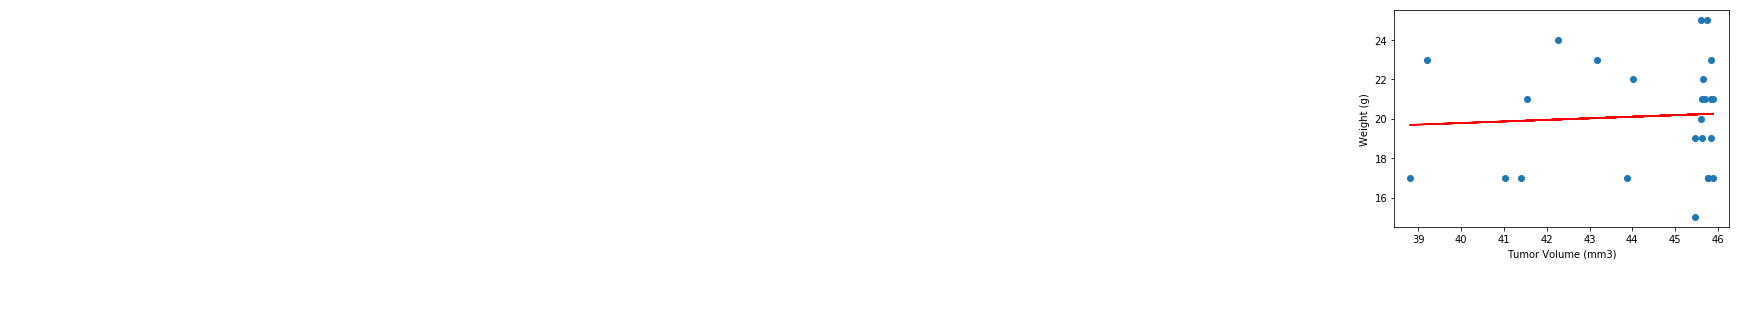

In [14]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_scat = clean_mickey[clean_mickey["Drug Regimen"].isin(["Capomulin"])]
cap_scat = cap_scat[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
cap_scat = cap_scat.drop_duplicates('Mouse ID')
x_values = cap_scat["Tumor Volume (mm3)"]
y_values = cap_scat["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()
